In [ ]:
#การโหลด Libraries เข้ามาใช้งาน 
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Store the data set
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Artificial Neural Network_ANN/diabetes.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Univariate and Multivariate_Artificial Neural Network_ANN/owid-covid-data.csv')
#Look at first 7 rows of data
df.head(7)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [ ]:
#Show the shape (number of rows & columns)
df.shape

(62827, 59)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62827 entries, 0 to 62826
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               62470 non-null  object 
 1   continent                              62097 non-null  object 
 2   location                               62827 non-null  object 
 3   date                                   62827 non-null  object 
 4   total_cases                            62213 non-null  float64
 5   new_cases                              62205 non-null  float64
 6   new_cases_smoothed                     61246 non-null  float64
 7   total_deaths                           53633 non-null  float64
 8   new_deaths                             53631 non-null  float64
 9   new_deaths_smoothed                    61246 non-null  float64
 10  total_cases_per_million                61856 non-null  float64
 11  ne

In [ ]:
#Show the number of missing (NAN, NaN, na) data for each column
df.isnull().sum()

iso_code                                   357
continent                                  730
location                                     0
date                                         0
total_cases                                614
new_cases                                  622
new_cases_smoothed                        1581
total_deaths                              9194
new_deaths                                9196
new_deaths_smoothed                       1581
total_cases_per_million                    971
new_cases_per_million                      979
new_cases_smoothed_per_million            1933
total_deaths_per_million                  9538
new_deaths_per_million                    9540
new_deaths_smoothed_per_million           1933
reproduction_rate                        12792
icu_patients                             55815
icu_patients_per_million                 55815
hosp_patients                            54503
hosp_patients_per_million                54503
weekly_icu_ad

In [ ]:
##.loc[:,[...]] ฟังก์ชันใช้เลือกเอาเฉพาะคอลัมน์ที่ต้องการนำมาใช้งาน
##.dropna() คำสั่งลบข้อมูล missing คือข้อมูลที่ไม่สมบูรณ์ออก
#data1.to_csv('D:/Face Detection/Datanew/data1.csv') #คำสั่งบันทึกไฟล์เก็บไว้เป็นนามสกุล .csv
dt = df.loc[:,['total_cases','new_cases',
               'total_deaths','new_deaths',
               'population','gdp_per_capita',
               'life_expectancy','human_development_index','location']].dropna() #คำสั่ง .loc ใช้เลือกข้อมูลบางคอลัมน์
dt

,total_cases,new_cases,total_deaths,new_deaths,population,gdp_per_capita,life_expectancy,human_development_index,location
27,34.0,4.0,1.0,1.0,38928341.0,1803.987,64.83,0.498,Afghanistan
28,41.0,7.0,1.0,0.0,38928341.0,1803.987,64.83,0.498,Afghanistan
29,43.0,2.0,1.0,0.0,38928341.0,1803.987,64.83,0.498,Afghanistan
30,76.0,33.0,2.0,1.0,38928341.0,1803.987,64.83,0.498,Afghanistan
31,80.0,4.0,3.0,1.0,38928341.0,1803.987,64.83,0.498,Afghanistan
...,...,...,...,...,...,...,...,...,...
62822,31320.0,313.0,1005.0,31.0,14862927.0,1899.775,61.49,0.535,Zimbabwe
62823,31646.0,326.0,1075.0,70.0,14862927.0,1899.775,61.49,0.535,Zimbabwe
62824,32004.0,358.0,1103.0,28.0,14862927.0,1899.775,61.49,0.535,Zimbabwe
62825,32304.0,300.0,1122.0,19.0,14862927.0,1899.775,61.49,0.535,Zimbabwe


In [ ]:
#dt['location'].unique() คำสั่งแสดงรายชื่อประเทศว่ามีประเทศอะไรบ้าง 
data = dt.location.unique() # .unique() เป็น method ใช้ดูรายชื่อประเทศว่ามีประเทศอะไรบ้าง
data

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Ic

In [ ]:
len(data)

170

In [ ]:
# การเลือกข้อมูลประเทศ
#sn.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/Supervised_Learning_Classification/covid-dataNew.csv')
df1 = dt.loc[dt['location'].isin(['United States','China','United Kingdom','France','Russia'])] #.set_index('location') #.reset_index()
df1

,total_cases,new_cases,total_deaths,new_deaths,population,gdp_per_capita,life_expectancy,human_development_index,location
11652,643.0,95.0,18.0,1.0,1.439324e+09,15308.712,76.91,0.752,China
11653,920.0,277.0,26.0,8.0,1.439324e+09,15308.712,76.91,0.752,China
11654,1406.0,486.0,42.0,16.0,1.439324e+09,15308.712,76.91,0.752,China
11655,2075.0,669.0,56.0,14.0,1.439324e+09,15308.712,76.91,0.752,China
11656,2877.0,802.0,82.0,26.0,1.439324e+09,15308.712,76.91,0.752,China
...,...,...,...,...,...,...,...,...,...
59779,25147891.0,131075.0,419251.0,1775.0,3.310026e+08,54225.446,78.86,0.924,United States
59780,25298986.0,151095.0,421168.0,1917.0,3.310026e+08,54225.446,78.86,0.924,United States
59781,25445583.0,146597.0,425252.0,4084.0,3.310026e+08,54225.446,78.86,0.924,United States
59782,25598061.0,152478.0,429195.0,3943.0,3.310026e+08,54225.446,78.86,0.924,United States


In [ ]:
#Show the number of missing (NAN, NaN, na) data for each column
df1.isnull().sum()

total_cases                0
new_cases                  0
total_deaths               0
new_deaths                 0
population                 0
gdp_per_capita             0
life_expectancy            0
human_development_index    0
location                   0
dtype: int64

In [ ]:
#Show the shape to see if any rows were dropped 
df1.shape

(1701, 9)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 11652 to 59783
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_cases              1701 non-null   float64
 1   new_cases                1701 non-null   float64
 2   total_deaths             1701 non-null   float64
 3   new_deaths               1701 non-null   float64
 4   population               1701 non-null   float64
 5   gdp_per_capita           1701 non-null   float64
 6   life_expectancy          1701 non-null   float64
 7   human_development_index  1701 non-null   float64
 8   location                 1701 non-null   object 
dtypes: float64(8), object(1)
memory usage: 132.9+ KB


In [ ]:
## LabelEncoder() เป็นคำสั่งแปลงชื่อประเทศให้เป็นเลขอันดับ (sequences) เช่น 0 1 2 3 4 เป็นต้น
## Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['location'] = label_encoder.fit_transform(df1['location']) 
#print(df1.head())
df1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,total_cases,new_cases,total_deaths,new_deaths,population,gdp_per_capita,life_expectancy,human_development_index,location
11652,643.0,95.0,18.0,1.0,1.439324e+09,15308.712,76.91,0.752,0
11653,920.0,277.0,26.0,8.0,1.439324e+09,15308.712,76.91,0.752,0
11654,1406.0,486.0,42.0,16.0,1.439324e+09,15308.712,76.91,0.752,0
11655,2075.0,669.0,56.0,14.0,1.439324e+09,15308.712,76.91,0.752,0
11656,2877.0,802.0,82.0,26.0,1.439324e+09,15308.712,76.91,0.752,0
...,...,...,...,...,...,...,...,...,...
59779,25147891.0,131075.0,419251.0,1775.0,3.310026e+08,54225.446,78.86,0.924,4
59780,25298986.0,151095.0,421168.0,1917.0,3.310026e+08,54225.446,78.86,0.924,4
59781,25445583.0,146597.0,425252.0,4084.0,3.310026e+08,54225.446,78.86,0.924,4
59782,25598061.0,152478.0,429195.0,3943.0,3.310026e+08,54225.446,78.86,0.924,4


In [ ]:
#Convert the data into an array
dataset = df1.values
dataset

array([[6.4300000e+02, 9.5000000e+01, 1.8000000e+01, ..., 7.6910000e+01,
        7.5200000e-01, 0.0000000e+00],
       [9.2000000e+02, 2.7700000e+02, 2.6000000e+01, ..., 7.6910000e+01,
        7.5200000e-01, 0.0000000e+00],
       [1.4060000e+03, 4.8600000e+02, 4.2000000e+01, ..., 7.6910000e+01,
        7.5200000e-01, 0.0000000e+00],
       ...,
       [2.5445583e+07, 1.4659700e+05, 4.2525200e+05, ..., 7.8860000e+01,
        9.2400000e-01, 4.0000000e+00],
       [2.5598061e+07, 1.5247800e+05, 4.2919500e+05, ..., 7.8860000e+01,
        9.2400000e-01, 4.0000000e+00],
       [2.5766681e+07, 1.6862000e+05, 4.3319500e+05, ..., 7.8860000e+01,
        9.2400000e-01, 4.0000000e+00]])

In [ ]:
# Get all of the rows from the first eight columns of the dataset
X = dataset[:,0:8] 
# Get all of the rows from the last column
y = dataset[:,8] 
print('X:', X)
X.shape
print('y:', y)
y.shape

X: [[6.4300000e+02 9.5000000e+01 1.8000000e+01 ... 1.5308712e+04
  7.6910000e+01 7.5200000e-01]
 [9.2000000e+02 2.7700000e+02 2.6000000e+01 ... 1.5308712e+04
  7.6910000e+01 7.5200000e-01]
 [1.4060000e+03 4.8600000e+02 4.2000000e+01 ... 1.5308712e+04
  7.6910000e+01 7.5200000e-01]
 ...
 [2.5445583e+07 1.4659700e+05 4.2525200e+05 ... 5.4225446e+04
  7.8860000e+01 9.2400000e-01]
 [2.5598061e+07 1.5247800e+05 4.2919500e+05 ... 5.4225446e+04
  7.8860000e+01 9.2400000e-01]
 [2.5766681e+07 1.6862000e+05 4.3319500e+05 ... 5.4225446e+04
  7.8860000e+01 9.2400000e-01]]
y: [0. 0. 0. ... 4. 4. 4.]


(1701,)

In [ ]:
#http://gg.gg/g7g3s
from keras.utils import to_categorical
y = to_categorical(y)
print('y:',y)
print('y.shape:',y.shape)

y: [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
y.shape: (1701, 5)


In [ ]:
# การแบ่งข้อมูลเก็บไว้ในตัวแปร X และ y อีกวิธีหนึ่ง
#X = df1.drop('location', axis=1).values
#y = df1['location'].values
#print('X', X)
#print('y', y)
#y.shape

In [ ]:
#การแปลงค่าข้อมูลของ features/columns ให้เป็น 0 และ 1 โดยการใช้วิธีการแบบ min-max scaler method

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[2.44890017e-05, 1.33304269e-01, 3.92433875e-05, ...,
        0.00000000e+00, 4.29563492e-01, 0.00000000e+00],
       [3.52393241e-05, 1.33829737e-01, 5.77108640e-05, ...,
        0.00000000e+00, 4.29563492e-01, 0.00000000e+00],
       [5.41009007e-05, 1.34433159e-01, 9.46458169e-05, ...,
        0.00000000e+00, 4.29563492e-01, 0.00000000e+00],
       ...,
       [9.87538242e-01, 5.56282806e-01, 9.81664104e-01, ...,
        1.00000000e+00, 6.23015873e-01, 1.00000000e+00],
       [9.93455887e-01, 5.73262347e-01, 9.90766262e-01, ...,
        1.00000000e+00, 6.23015873e-01, 1.00000000e+00],
       [1.00000000e+00, 6.19867305e-01, 1.00000000e+00, ...,
        1.00000000e+00, 6.23015873e-01, 1.00000000e+00]])

In [ ]:
# การแบ่งข้อมูลเพื่อใช้ในการ training set 80% และ testing set 20%
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 4)

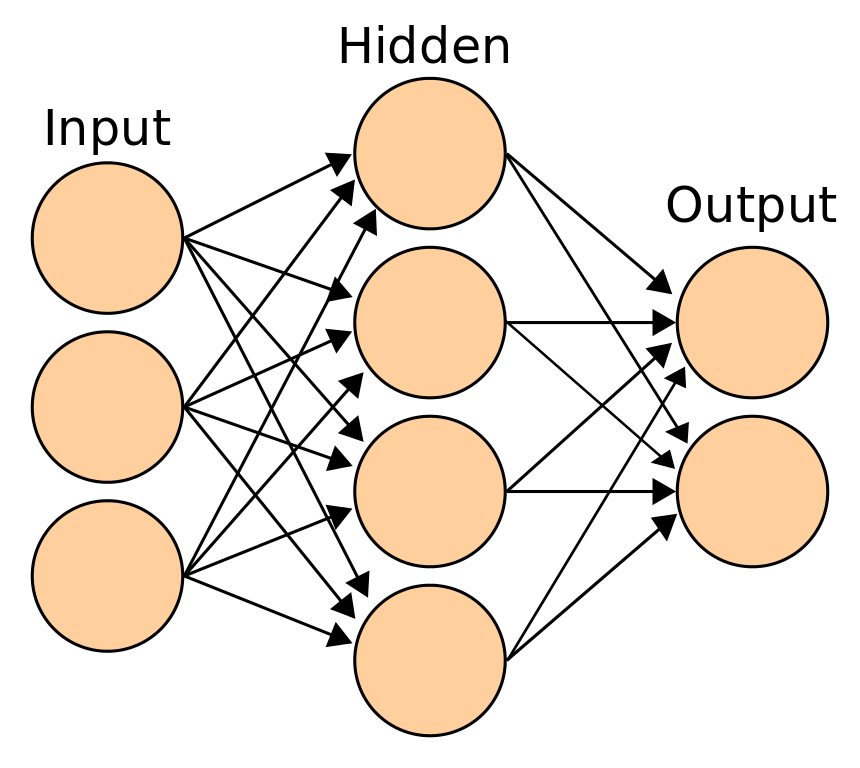![image.png]

In [ ]:
#model = Sequential([
#    Dense(12, activation='relu', input_shape=( 8 ,)),
#    Dropout(0.2),
#    Dense(15, activation='relu'),
#    Dropout(0.2),
#    Dense(5, activation='softmax')
#])

In [ ]:
#https://faroit.com/keras-docs/1.0.1/getting-started/sequential-model-guide/

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [ ]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 8-dimensional vectors.
model.add(Dense(25, activation='relu', input_dim=8))
model.add(Dropout(0.1))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                225       
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                520       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#from keras.optimizers import adam
import tensorflow as tf
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train,
          epochs=100, batch_size=50, 
          verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, batch_size=100)
print('\nScore:', score)

Epoch 1/100
22/22 [==============================] - 1s 23ms/step - loss: 1.3861 - accuracy: 0.4746 - val_loss: 0.7226 - val_accuracy: 0.6098
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.6218 - val_loss: 0.4445 - val_accuracy: 0.8712
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.9087 - val_loss: 0.2186 - val_accuracy: 0.9583
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.2253 - accuracy: 0.9407 - val_loss: 0.1763 - val_accuracy: 0.9432
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1748 - accuracy: 0.9343 - val_loss: 0.0623 - val_accuracy: 1.0000
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0979 - accuracy: 0.9917 - val_loss: 0.0329 - val_accuracy: 1.0000
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9989 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 8/100


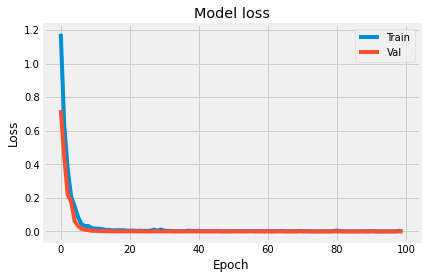

In [ ]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

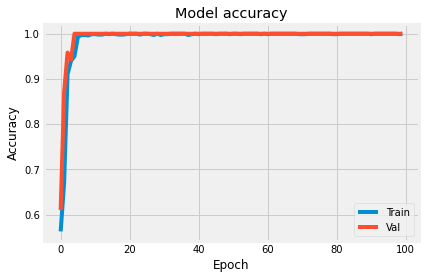

In [ ]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 1ms/step - loss: 7.8821e-06 - accuracy: 1.0000


[7.88212946645217e-06, 1.0]

## การประเมินโมเดล Train set และ Test set ด้วย MAE, RMSE, R-Square

In [ ]:
### การประเมินโมเดลด้วย MAE, RMSE, R-Square
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# make predictions on the testing set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Train MAE:",metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Train R Square:", r2_score(y_train, y_train_pred))

print("\nTest MAE:", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Test R Square:", r2_score(y_test, y_test_pred))

### R-Square ค่าร้อยละ (%) ความแม่นยำของโมเดล

### MAE: Mean Absolute Error ค่าเฉลี่ยความคลาดเคลื่อนสัมบูรณ์ 
#ถ้าค่าเข้าใกล้ 0 หรือ น้อยกว่า 0 แสดงว่าโมเดลมีความแม่นยำมาก 
#ถ้าค่าเข้าใกล้ 1 แสดงว่าโมเดลมีความแม่นยำน้อย

### RMSE: Root Mean Square Error รากที่สองของค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง
#ถ้าค่าเข้าใกล้ 0 หรือ น้อยกว่า 0 แสดงว่าโมเดลมีความแม่นยำมาก 
#ถ้าค่าเข้าใกล้ 1 แสดงว่าโมเดลมีความแม่นยำน้อย

Train MAE: 3.4921316e-06
Train RMSE: 1.171024e-05
Train R Square: 0.99999999912638

Test MAE: 3.1542047e-06
Test RMSE: 1.0336539e-05
Test R Square: 0.9999999993498958


## การพยากรณ์/ทำนายโมเดล

In [ ]:
#Make a prediction & print the actual values
prediction = model.predict(X_test)
#prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
print('Actual:\n', prediction)
print('\nPredicted:\n', y_test)

#ข้อมูลแถวที่ 1 คือข้อมูลจริง [Actual]
#ข้อมูลแถวที่ 2 เป็นต้นไป คือข้อมูลทำนาย/พยากรณ์ [Predicted]

Actual:
 [[2.7294014e-10 9.9999988e-01 2.4692984e-12 8.9635840e-08 1.8702539e-18]
 [8.2280428e-07 1.0578812e-11 9.9999917e-01 2.0482007e-08 4.4171365e-08]
 [1.0000000e+00 1.8806909e-12 3.0404576e-21 0.0000000e+00 0.0000000e+00]
 ...
 [1.9237134e-10 9.9999988e-01 1.5270816e-12 6.1766592e-08 7.5681634e-19]
 [8.3931354e-07 1.0665607e-11 9.9999917e-01 1.3135340e-08 2.4069026e-08]
 [1.2892000e-19 9.9201755e-22 3.5770957e-14 6.9653112e-07 9.9999928e-01]]

Predicted:
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
#n = df1[[0, 1, 2, 3, 4]].astype(int)
import numpy as np
df1 = pd.DataFrame(prediction)
df2 = pd.DataFrame(y_test)
#print('Actual:', df1.head(10), abs(np.round(df1+0.1).head(10).astype(int)), sep='\n')
print('Actual:', abs(np.round(df1+0.1).head(10).astype(int)), sep='\n')
print('\nPredicted:\n', df2.head(10).astype(int))

Actual:
   0  1  2  3  4
0  0  1  0  0  0
1  0  0  1  0  0
2  1  0  0  0  0
3  0  0  0  0  1
4  0  0  0  0  1
5  0  0  0  0  1
6  1  0  0  0  0
7  0  0  0  0  1
8  1  0  0  0  0
9  0  1  0  0  0

Predicted:
    0  1  2  3  4
0  0  1  0  0  0
1  0  0  1  0  0
2  1  0  0  0  0
3  0  0  0  0  1
4  0  0  0  0  1
5  0  0  0  0  1
6  1  0  0  0  0
7  0  0  0  0  1
8  1  0  0  0  0
9  0  1  0  0  0


## การประเมินโมเดลด้วย Confustion Matrix

In [ ]:
# การเลือกข้อมูลประเทศ
#sn.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/Supervised_Learning_Classification/covid-dataNew.csv')
df2 = dt.loc[dt['location'].isin(['United States','China','United Kingdom','France','Russia'])] #.set_index('location') #.reset_index()
df2

,total_cases,new_cases,total_deaths,new_deaths,population,gdp_per_capita,life_expectancy,human_development_index,location
11263,643.0,95.0,18.0,1.0,1.439324e+09,15308.712,76.91,0.752,China
11264,920.0,277.0,26.0,8.0,1.439324e+09,15308.712,76.91,0.752,China
11265,1406.0,486.0,42.0,16.0,1.439324e+09,15308.712,76.91,0.752,China
11266,2075.0,669.0,56.0,14.0,1.439324e+09,15308.712,76.91,0.752,China
11267,2877.0,802.0,82.0,26.0,1.439324e+09,15308.712,76.91,0.752,China
...,...,...,...,...,...,...,...,...,...
57756,23078960.0,230166.0,384768.0,3963.0,3.310026e+08,54225.446,78.86,0.924,United States
57757,23314521.0,235561.0,388697.0,3929.0,3.310026e+08,54225.446,78.86,0.924,United States
57758,23556097.0,241576.0,392499.0,3802.0,3.310026e+08,54225.446,78.86,0.924,United States
57759,23758855.0,202758.0,395851.0,3352.0,3.310026e+08,54225.446,78.86,0.924,United States


In [ ]:
## การแบ่งข้อมูลอีกวิธีหนึ่ง เพื่อ train โมเดล ให้อยู่ในตัวแปรต้น (X) และตัวแปรตาม (y)
## .values การแบ่งข้อมูลแล้วแปลงให้เป็นข้อมูลอาเรย์
X = df2.drop('location',axis=1).values
y = df2['location'].values
print('X:', X)
print('y:', y)

X: [[6.4300000e+02 9.5000000e+01 1.8000000e+01 ... 1.5308712e+04
  7.6910000e+01 7.5200000e-01]
 [9.2000000e+02 2.7700000e+02 2.6000000e+01 ... 1.5308712e+04
  7.6910000e+01 7.5200000e-01]
 [1.4060000e+03 4.8600000e+02 4.2000000e+01 ... 1.5308712e+04
  7.6910000e+01 7.5200000e-01]
 ...
 [2.3556097e+07 2.4157600e+05 3.9249900e+05 ... 5.4225446e+04
  7.8860000e+01 9.2400000e-01]
 [2.3758855e+07 2.0275800e+05 3.9585100e+05 ... 5.4225446e+04
  7.8860000e+01 9.2400000e-01]
 [2.3933368e+07 1.7451300e+05 3.9757400e+05 ... 5.4225446e+04
  7.8860000e+01 9.2400000e-01]]
y: ['China' 'China' 'China' ... 'United States' 'United States'
 'United States']


In [ ]:
## StandardScaler คำสั่งแปลงข้อมูลในตัวแปร X ให้เป็น binary คือ 0 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print('X:',X)

X: [[-0.48806098 -0.48300791 -0.68598075 ... -1.39610905 -0.46284857
  -1.57394536]
 [-0.48798586 -0.47872433 -0.68587299 ... -1.39610905 -0.46284857
  -1.57394536]
 [-0.48785405 -0.47380527 -0.68565745 ... -1.39610905 -0.46284857
  -1.57394536]
 ...
 [ 5.90032392  5.20052784  4.60109175 ...  1.47566337  0.09627385
   0.90617274]
 [ 5.95531314  4.28690113  4.64624621 ...  1.47566337  0.09627385
   0.90617274]
 [ 6.00264215  3.62212226  4.66945657 ...  1.47566337  0.09627385
   0.90617274]]


In [ ]:
# การแบ่งข้อมูลเพื่อนำไปสู่การ train และ test โมเดล ในที่นี่ใช้ train set 70% และใช้ test set 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
# l1 regularization gives better results
lr = LogisticRegression(penalty='l2', C=10, random_state=25)
lr.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=25, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import metrics
# generate evaluation metrics
print("Train - Accuracy :", metrics.accuracy_score(y_train, lr.predict(X_train)))
print("\nTrain - Confusion matrix :\n",metrics.confusion_matrix(y_train,lr.predict(X_train)))
print("Train - classification report :\n", metrics.classification_report(y_train, lr.predict(X_train)))

Train - Accuracy : 1.0

Train - Confusion matrix :
 [[255   0   0   0   0]
 [  0 233   0   0   0]
 [  0   0 216   0   0]
 [  0   0   0 224   0]
 [  0   0   0   0 224]]
Train - classification report :
                 precision    recall  f1-score   support

         China       1.00      1.00      1.00       255
        France       1.00      1.00      1.00       233
        Russia       1.00      1.00      1.00       216
United Kingdom       1.00      1.00      1.00       224
 United States       1.00      1.00      1.00       224

      accuracy                           1.00      1152
     macro avg       1.00      1.00      1.00      1152
  weighted avg       1.00      1.00      1.00      1152



In [ ]:
from sklearn import metrics
print("Test - Accuracy :", metrics.accuracy_score(y_test, lr.predict(X_test)))
print("\nTest - Confusion matrix :\n",metrics.confusion_matrix(y_test,lr.predict(X_test)))
print("Test - classification report :\n", metrics.classification_report(y_test, lr.predict(X_test)))

Test - Accuracy : 1.0

Test - Confusion matrix :
 [[106   0   0   0   0]
 [  0 105   0   0   0]
 [  0   0  89   0   0]
 [  0   0   0  94   0]
 [  0   0   0   0 100]]
Test - classification report :
                 precision    recall  f1-score   support

         China       1.00      1.00      1.00       106
        France       1.00      1.00      1.00       105
        Russia       1.00      1.00      1.00        89
United Kingdom       1.00      1.00      1.00        94
 United States       1.00      1.00      1.00       100

      accuracy                           1.00       494
     macro avg       1.00      1.00      1.00       494
  weighted avg       1.00      1.00      1.00       494

